In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
breast = pd.read_csv('/content/breast cancer.csv')

breast.drop('Unnamed: 32', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("="*60)
print("RANDOM FOREST CLASSIFIER FOR BREAST CANCER DETECTION")
print("="*60)

# Initialize Random Forest with basic parameters
rf_basic = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=0              # No training output
)

# Train the model
rf_basic.fit(X_train, y_train)
print("Random Forest trained successfully!")
print(f"Number of trees: {len(rf_basic.estimators_)}")

RANDOM FOREST CLASSIFIER FOR BREAST CANCER DETECTION
Random Forest trained successfully!
Number of trees: 100


In [ ]:
# Make predictions
y_pred_rf = rf_basic.predict(X_test)
y_pred_proba_rf = rf_basic.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("\n" + "-"*50)
print("BASIC RANDOM FOREST PERFORMANCE")
print("-"*50)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall (Sensitivity): {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

# Detailed classification report
print("\n" + "-"*50)
print("CLASSIFICATION REPORT")
print("-"*50)
print(classification_report(y_test, y_pred_rf,
                            target_names=['Benign (0)', 'Malignant (1)']))


--------------------------------------------------
BASIC RANDOM FOREST PERFORMANCE
--------------------------------------------------
Accuracy: 0.9649
Precision: 0.9756
Recall (Sensitivity): 0.9302
F1-Score: 0.9524
ROC-AUC Score: 0.9972

--------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        71
Malignant (1)       0.98      0.93      0.95        43

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114




FEATURE IMPORTANCE (Random Forest)
Top 10 Most Important Features:
   Feature  Importance
Feature_23    0.132452
Feature_24    0.125414
Feature_28    0.108197
Feature_21    0.097972
 Feature_8    0.086885
Feature_27    0.052983
 Feature_7    0.050980
 Feature_3    0.050843
 Feature_4    0.040561
Feature_14    0.034258


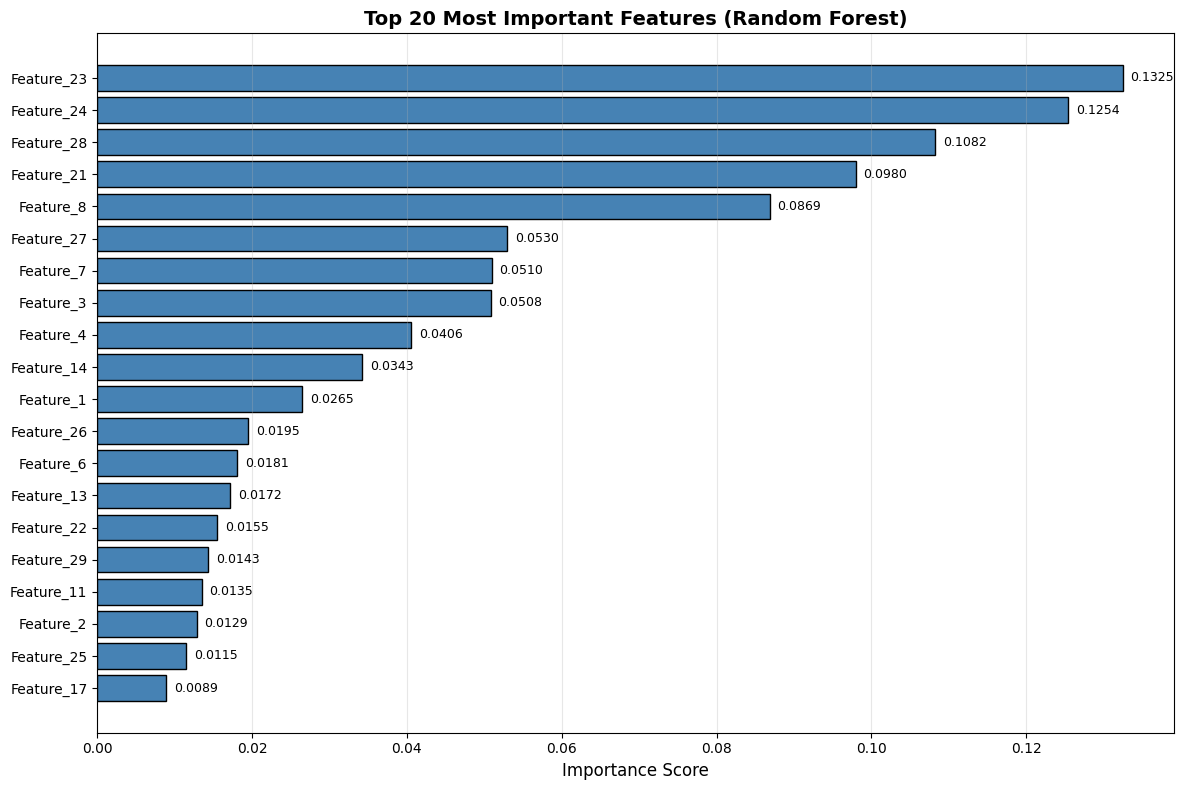

In [ ]:
# Feature importance
feature_importance = rf_basic.feature_importances_

# Create DataFrame for feature importance
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*50)
print("Top 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_n = min(20, len(importance_df))
top_features = importance_df.head(top_n)

bars = plt.barh(range(len(top_features)), top_features['Importance'],
                color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title(f'Top {top_n} Most Important Features (Random Forest)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, importance) in enumerate(zip(bars, top_features['Importance'])):
    plt.text(importance + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}',
             ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

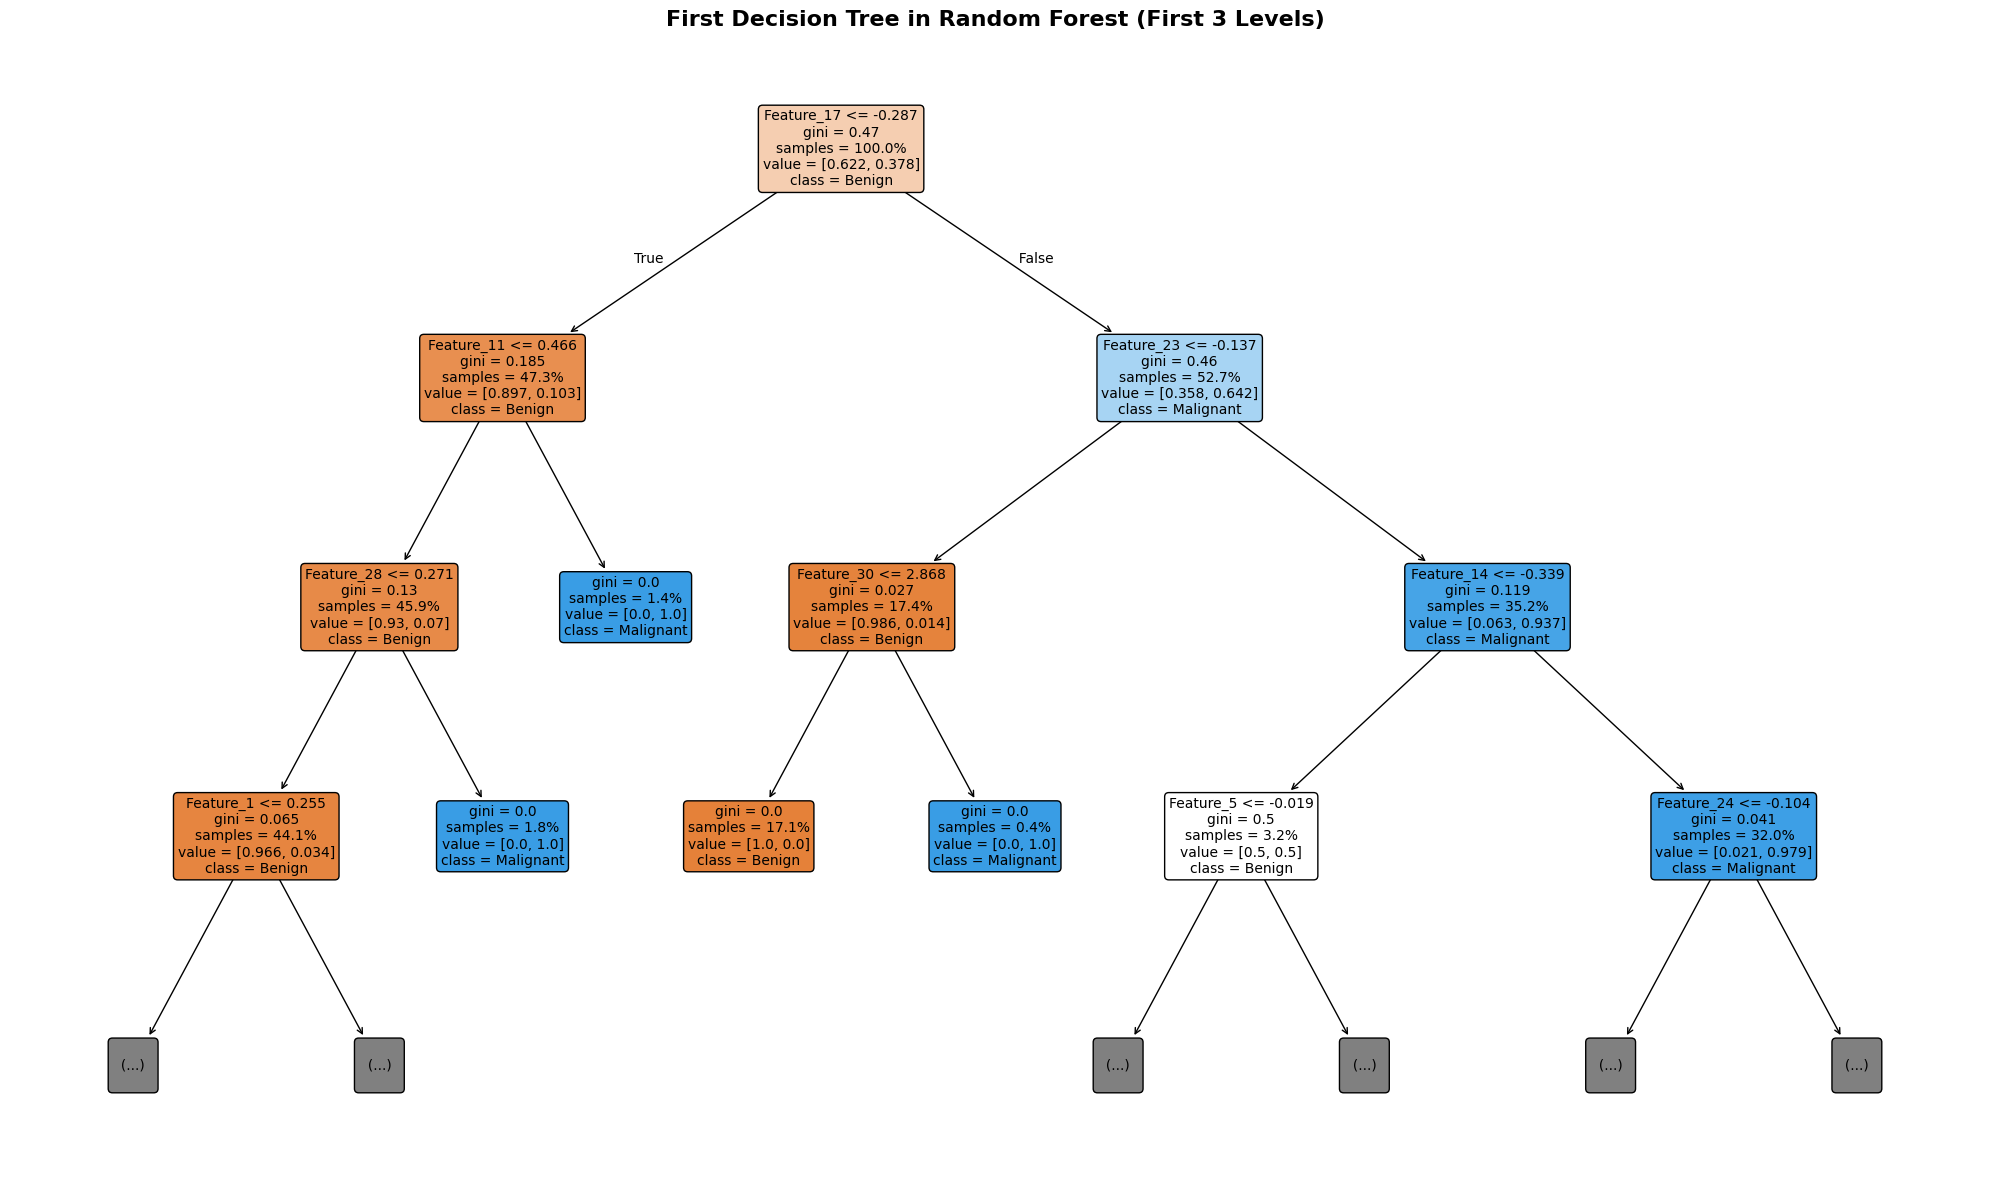

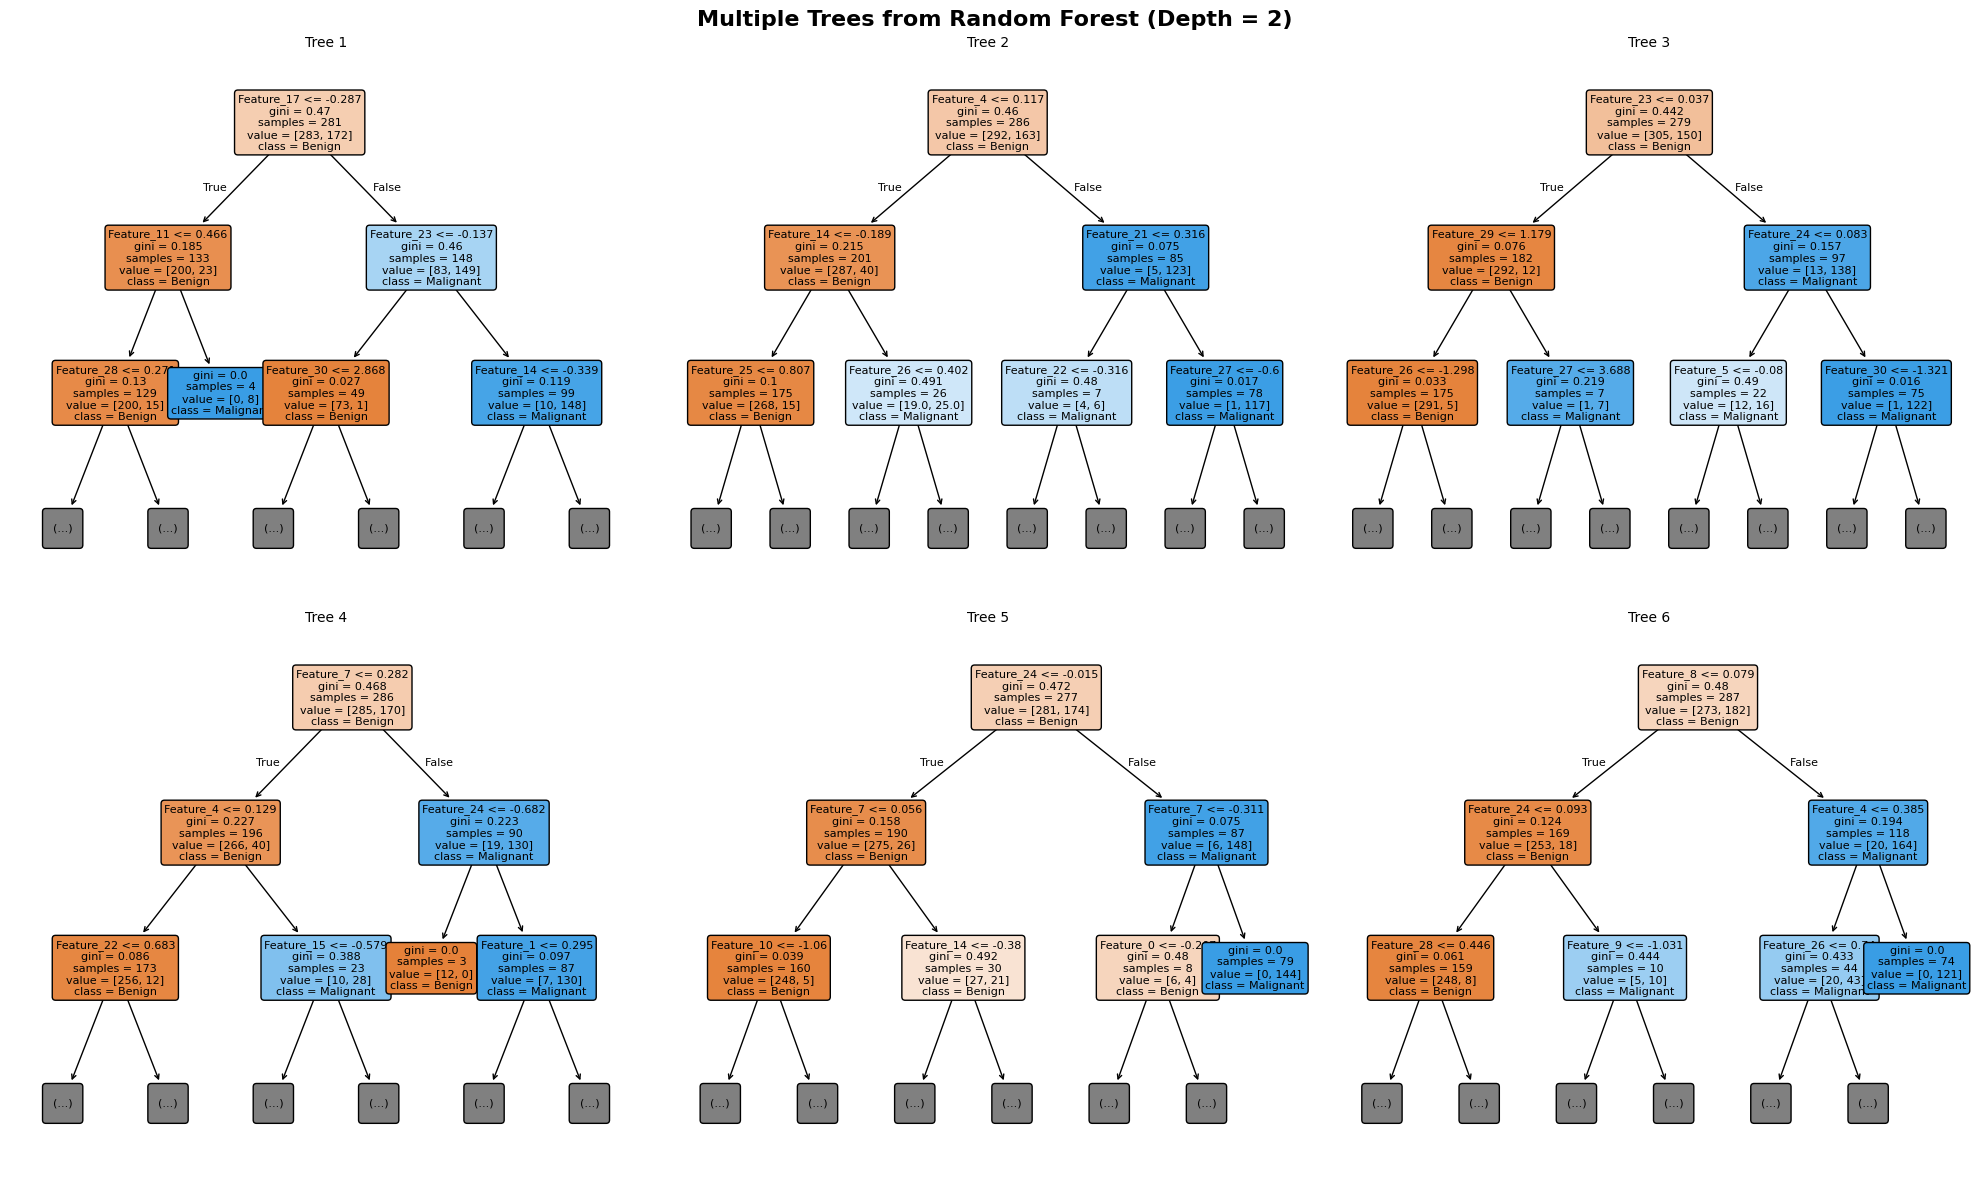

In [ ]:
# Visualize a single decision tree from the forest
plt.figure(figsize=(20, 12))
tree_to_visualize = rf_basic.estimators_[0]  # First tree in the forest

plot_tree(tree_to_visualize,
          feature_names=feature_names,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          max_depth=3,  # Show only first 3 levels
          fontsize=10,
          proportion=True)

plt.title("First Decision Tree in Random Forest (First 3 Levels)",
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show multiple trees at shallow depth
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, ax in enumerate(axes[:6]):
    tree_idx = i
    plot_tree(rf_basic.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=['Benign', 'Malignant'],
              filled=True,
              rounded=True,
              max_depth=2,
              ax=ax,
              fontsize=8)
    ax.set_title(f'Tree {tree_idx + 1}', fontsize=10)

plt.suptitle('Multiple Trees from Random Forest (Depth = 2)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


--------------------------------------------------
CONFUSION MATRIX ANALYSIS
--------------------------------------------------
True Negatives (TN): 70
False Positives (FP): 1
False Negatives (FN): 3
True Positives (TP): 40

Specificity (TN Rate): 0.9859
False Positive Rate: 0.0141
False Negative Rate: 0.0698


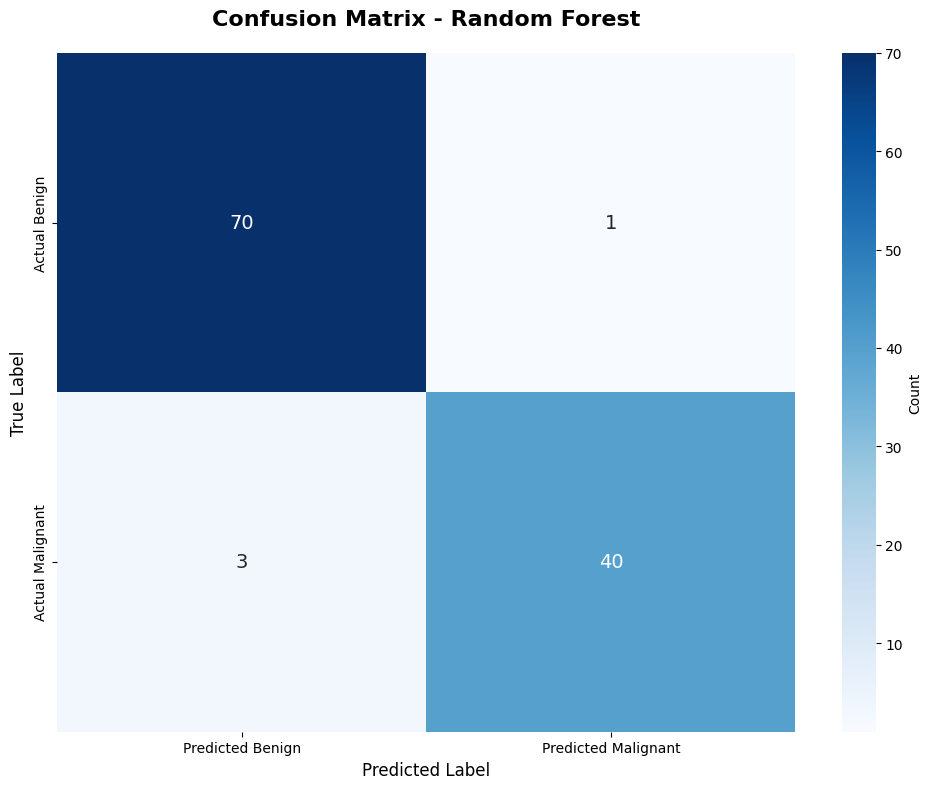

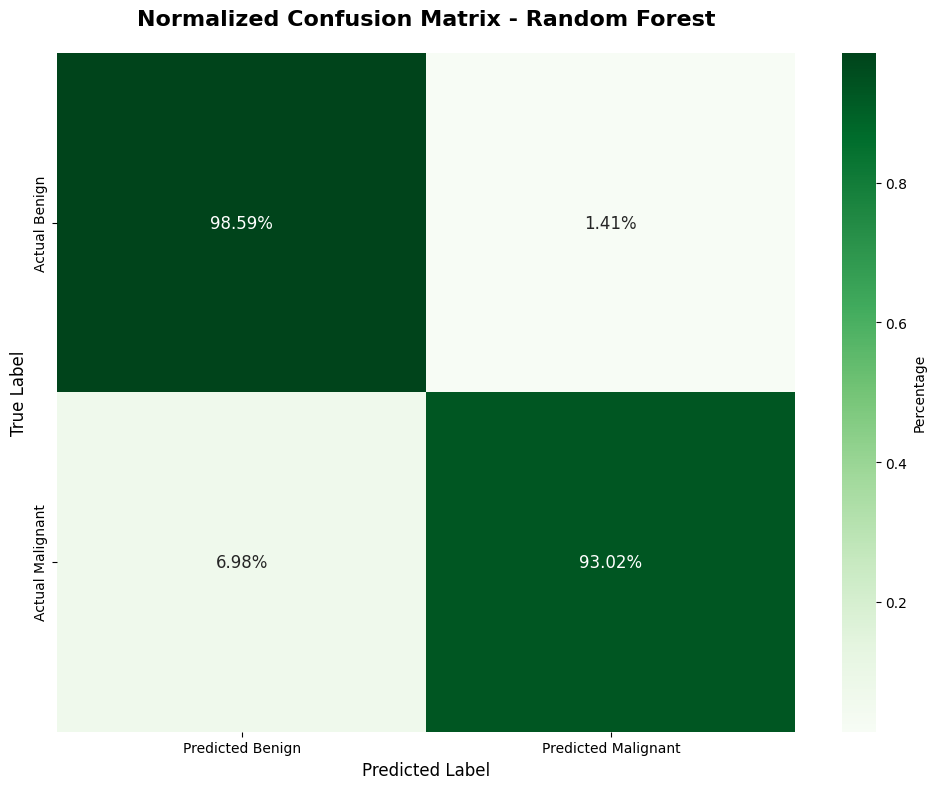

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

print("\n" + "-"*50)
print("CONFUSION MATRIX ANALYSIS")
print("-"*50)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nSpecificity (TN Rate): {tn/(tn+fp):.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 14})

plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_normalized = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized,
            annot=True,
            fmt='.2%',
            cmap='Greens',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            cbar_kws={'label': 'Percentage'},
            annot_kws={'size': 12})

plt.title('Normalized Confusion Matrix - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

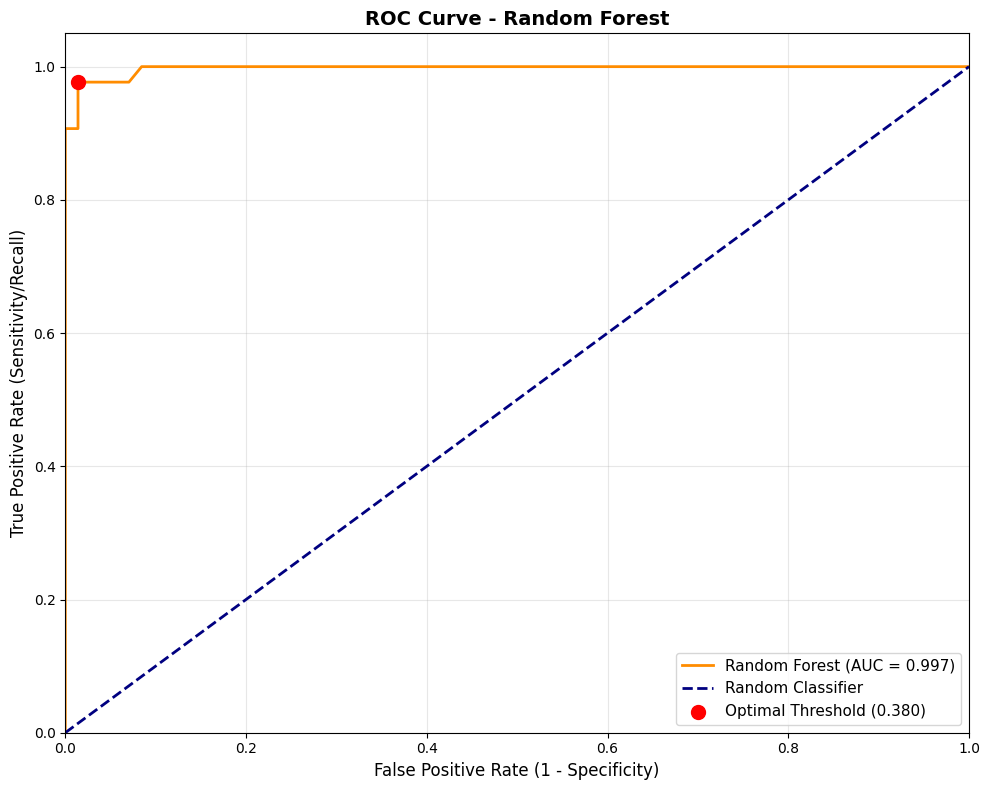


Optimal Threshold (Youden's J): 0.380
At this threshold:
  Sensitivity: 0.977
  Specificity: 0.986


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Mark optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

plt.scatter(fpr[optimal_idx], tpr[optimal_idx],
            color='red', s=100, zorder=5,
            label=f'Optimal Threshold ({optimal_threshold:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title('ROC Curve - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal Threshold (Youden's J): {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"  Sensitivity: {tpr[optimal_idx]:.3f}")
print(f"  Specificity: {1 - fpr[optimal_idx]:.3f}")

In [ ]:
# Hyperparameter tuning
print("\n" + "="*50)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*50)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

print("Performing grid search... (this may take a while)")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation accuracy: {grid_search.best_score_:.4f}")

# Use the best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test accuracy with tuned model: {accuracy_best:.4f}")


HYPERPARAMETER TUNING WITH GRID SEARCH
Performing grid search... (this may take a while)
Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Best parameters found:
  bootstrap: True
  max_depth: 10
  max_features: log2
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

Best cross-validation accuracy: 0.9626
Test accuracy with tuned model: 0.9649



ANALYZING EFFECT OF NUMBER OF TREES
n_estimators =   1: Train Acc = 0.9516, Test Acc = 0.9211
n_estimators =   5: Train Acc = 0.9890, Test Acc = 0.9649
n_estimators =  10: Train Acc = 0.9978, Test Acc = 0.9737
n_estimators =  25: Train Acc = 0.9978, Test Acc = 0.9737
n_estimators =  50: Train Acc = 0.9978, Test Acc = 0.9649
n_estimators = 100: Train Acc = 1.0000, Test Acc = 0.9649
n_estimators = 150: Train Acc = 1.0000, Test Acc = 0.9649
n_estimators = 200: Train Acc = 1.0000, Test Acc = 0.9649


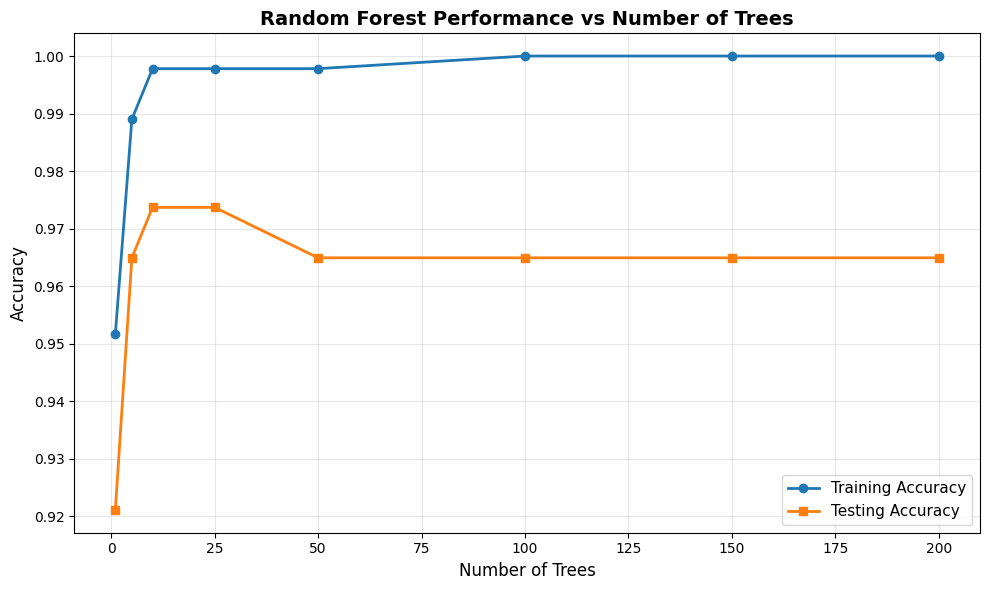

In [ ]:
# Analyze effect of number of trees
print("\n" + "="*50)
print("ANALYZING EFFECT OF NUMBER OF TREES")
print("="*50)

n_trees_range = [1, 5, 10, 25, 50, 100, 150, 200]
train_scores = []
test_scores = []

for n_trees in n_trees_range:
    rf_temp = RandomForestClassifier(
        n_estimators=n_trees,
        random_state=42,
        n_jobs=-1
    )
    rf_temp.fit(X_train, y_train)

    train_score = rf_temp.score(X_train, y_train)
    test_score = rf_temp.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"n_estimators = {n_trees:3d}: Train Acc = {train_score:.4f}, Test Acc = {test_score:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(n_trees_range, test_scores, 's-', label='Testing Accuracy', linewidth=2)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest Performance vs Number of Trees', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# OOB Error analysis
print("\n" + "="*50)
print("OUT-OF-BAG (OOB) ERROR ANALYSIS")
print("="*50)

# Train Random Forest with OOB scoring
rf_oob = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    oob_score=True,  # Enable OOB scoring
    n_jobs=-1
)

rf_oob.fit(X_train, y_train)

print(f"OOB Score: {rf_oob.oob_score_:.4f}")
print(f"OOB Error: {1 - rf_oob.oob_score_:.4f}")

# Compare with test accuracy
test_acc_oob = accuracy_score(y_test, rf_oob.predict(X_test))
print(f"Test Accuracy: {test_acc_oob:.4f}")
print(f"Difference (OOB vs Test): {abs(rf_oob.oob_score_ - test_acc_oob):.4f}")


OUT-OF-BAG (OOB) ERROR ANALYSIS
OOB Score: 0.9560
OOB Error: 0.0440
Test Accuracy: 0.9649
Difference (OOB vs Test): 0.0089


In [ ]:
# Your input for prediction
input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)

np_df = np.asarray(input_text).reshape(1, -1)

# Make prediction with both basic and tuned models
pred_basic = rf_basic.predict(np_df)
pred_proba_basic = rf_basic.predict_proba(np_df)
pred_tuned = best_rf.predict(np_df) if 'best_rf' in locals() else None
pred_proba_tuned = best_rf.predict_proba(np_df) if 'best_rf' in locals() else None

print("\n" + "="*60)
print("SINGLE PREDICTION - RANDOM FOREST")
print("="*60)

print("\n🔹 Basic Random Forest:")
print(f"   Raw Prediction: {pred_basic[0]}")
print(f"   Probabilities: [Benign: {pred_proba_basic[0][0]:.4f}, Malignant: {pred_proba_basic[0][1]:.4f}]")
print(f"   Prediction: {'MALIGNANT (Cancerous) ' if pred_basic[0] == 1 else 'BENIGN (Not Cancerous) '}")
print(f"   Confidence: {max(pred_proba_basic[0]):.2%}")

if 'best_rf' in locals():
    print("\n🔹 Tuned Random Forest:")
    print(f"   Raw Prediction: {pred_tuned[0]}")
    print(f"   Probabilities: [Benign: {pred_proba_tuned[0][0]:.4f}, Malignant: {pred_proba_tuned[0][1]:.4f}]")
    print(f"   Prediction: {'MALIGNANT (Cancerous) ' if pred_tuned[0] == 1 else 'BENIGN (Not Cancerous) '}")
    print(f"   Confidence: {max(pred_proba_tuned[0]):.2%}")

# Check individual tree predictions
print("\n🔹 Individual Tree Predictions (First 10 trees):")
tree_predictions = []
for i, tree in enumerate(rf_basic.estimators_[:10]):
    tree_pred = tree.predict(np_df)[0]
    tree_predictions.append(tree_pred)
    print(f"   Tree {i+1}: {'Malignant' if tree_pred == 1 else 'Benign'}")

print(f"\n   Consensus: {sum(tree_predictions)} out of 10 trees predict Malignant")


SINGLE PREDICTION - RANDOM FOREST

🔹 Basic Random Forest:
   Raw Prediction: 1
   Probabilities: [Benign: 0.0600, Malignant: 0.9400]
   Prediction: MALIGNANT (Cancerous) 
   Confidence: 94.00%

🔹 Tuned Random Forest:
   Raw Prediction: 1
   Probabilities: [Benign: 0.0392, Malignant: 0.9608]
   Prediction: MALIGNANT (Cancerous) 
   Confidence: 96.08%

🔹 Individual Tree Predictions (First 10 trees):
   Tree 1: Malignant
   Tree 2: Malignant
   Tree 3: Malignant
   Tree 4: Malignant
   Tree 5: Malignant
   Tree 6: Malignant
   Tree 7: Malignant
   Tree 8: Benign
   Tree 9: Malignant
   Tree 10: Malignant

   Consensus: 9.0 out of 10 trees predict Malignant



MODEL COMPARISON

Model Comparison:
                Model  Accuracy  Precision   Recall  F1-Score
        Decision Tree  0.938596   0.909091 0.930233  0.919540
Random Forest (Basic)  0.964912   0.975610 0.930233  0.952381
Random Forest (Tuned)  0.964912   0.975610 0.930233  0.952381


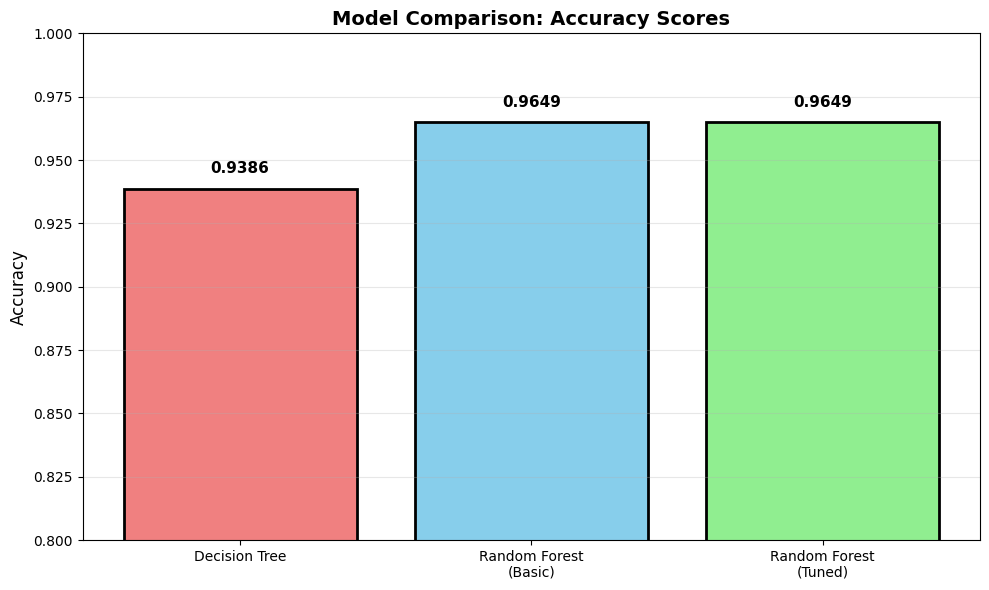

In [ ]:
# Compare Random Forest with other models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Train a simple Decision Tree for comparison
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest (Basic)', 'Random Forest (Tuned)'],
    'Accuracy': [accuracy_dt, accuracy_rf, accuracy_best if 'accuracy_best' in locals() else None],
    'Precision': [precision_score(y_test, y_pred_dt), precision_rf, precision_score(y_test, y_pred_best) if 'best_rf' in locals() else None],
    'Recall': [recall_score(y_test, y_pred_dt), recall_rf, recall_score(y_test, y_pred_best) if 'best_rf' in locals() else None],
    'F1-Score': [f1_score(y_test, y_pred_dt), f1_rf, f1_score(y_test, y_pred_best) if 'best_rf' in locals() else None]
})

print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Visual comparison
if 'best_rf' in locals():
    models = ['Decision Tree', 'Random Forest\n(Basic)', 'Random Forest\n(Tuned)']
    accuracies = [accuracy_dt, accuracy_rf, accuracy_best]

    plt.figure(figsize=(10, 6))
    colors = ['lightcoral', 'skyblue', 'lightgreen']
    bars = plt.bar(models, accuracies, color=colors, edgecolor='black', linewidth=2)

    plt.ylim(0.8, 1.0)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Model Comparison: Accuracy Scores', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                 f'{acc:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [ ]:
# Save the trained model
import joblib

# Save basic model
joblib.dump(rf_basic, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")

# Save feature importance
importance_df.to_csv('feature_importance.csv', index=False)
print("Feature importance saved as 'feature_importance.csv'")

# To load and use later:
# loaded_model = joblib.load('random_forest_model.pkl')
# predictions = loaded_model.predict(new_data)

Random Forest model saved as 'random_forest_model.pkl'
Feature importance saved as 'feature_importance.csv'
